In [1]:
import numpy as np


def mesh_P1_modified(level, size_x, size_y, size_z):
    # numbers of segments, nodes, and elements
    size_min = min([size_x, size_y, size_z])

    N_x = round(size_x / size_min) * (2 ** level)
    N_y = round(size_y / size_min) * (2 ** level)
    N_z = round(size_z / size_min) * (2 ** level)

    n_e = 6 * N_x * N_y * N_z

    # C - 3D auxiliary array
    C = np.arange(1, (N_x + 1) * (N_y + 1) * (N_z + 1) + 1).reshape(N_x + 1, N_y + 1, N_z + 1)

    # coordinates of nodes
    coord_x = np.linspace(0, size_x, N_x + 1)
    coord_y = np.linspace(0, size_y, N_y + 1)
    coord_z = np.linspace(0, size_z, N_z + 1)

    c_x = np.tile(coord_x, (N_y + 1) * (N_z + 1))
    c_y = np.tile(np.kron(coord_y, np.ones(N_x + 1)), N_z + 1)
    c_z = np.kron(coord_z, np.ones((N_x + 1) * (N_y + 1)))

    coord = np.array([c_x, c_y, c_z])

    # construction of the array elem
    # here we're replicating MATLAB's way of slicing with logical arrays using Python slicing
    V1 = np.zeros((N_x + 1, N_y + 1, N_z + 1), dtype=bool)
    V1[:-1, :-1, :-1] = True

    V2 = np.roll(V1, shift=-1, axis=0)
    V3 = np.roll(V2, shift=-1, axis=1)
    V4 = np.roll(V1, shift=-1, axis=1)
    V5 = np.roll(V1, shift=-1, axis=2)
    V6 = np.roll(V2, shift=-1, axis=2)
    V7 = np.roll(V3, shift=-1, axis=2)
    V8 = np.roll(V4, shift=-1, axis=2)

    aux_elem = np.array([
        C[V1], C[V2], C[V4], C[V6],
        C[V1], C[V4], C[V5], C[V6],
        C[V4], C[V5], C[V6], C[V8],
        C[V2], C[V3], C[V4], C[V6],
        C[V3], C[V6], C[V7], C[V4],
        C[V4], C[V6], C[V7], C[V8]
    ]).T.ravel()

    elem = aux_elem.reshape(4, n_e)

    # Surface of the body - the array "surf"
    # a helper function to generate surface
    def generate_surface(C_slice):
        N1, N2 = C_slice.shape
        V1_s = np.zeros_like(C_slice, dtype=bool)
        V1_s[:-1, :-1] = True
        V2_s = np.roll(V1_s, shift=-1, axis=0)
        V3_s = np.roll(V2_s, shift=-1, axis=1)
        V4_s = np.roll(V1_s, shift=-1, axis=1)
        aux_surf = np.array([
            C_slice[V1_s], C_slice[V2_s], C_slice[V4_s],
            C_slice[V3_s], C_slice[V4_s], C_slice[V2_s]
        ]).T.ravel()
        return aux_surf.reshape(3, 2 * (N1 - 1) * (N2 - 1))

    surf1 = generate_surface(C[:, :, 0])
    surf2 = generate_surface(C[:, :, -1])
    surf3 = generate_surface(C[:, 0, :].T)
    surf4 = generate_surface(C[-1, :, :].T)
    surf5 = generate_surface(C[:, -1, :].T)
    surf6 = generate_surface(C[0, :, :].T)

    surf = np.concatenate([surf1, surf2, surf3, surf4, surf5, surf6], axis=1)

    return coord, elem, surf


# Example usage:
level = 1
size_x = 20
size_y = 10
size_z = 10
coord, elem, surf = mesh_P1_modified(level, size_x, size_y, size_z)
print("Coordinates:\n", coord)
print("\nElem:\n", elem)
print("\nSurface:\n", surf)

Coordinates:
 [[ 0.  5. 10. 15. 20.  0.  5. 10. 15. 20.  0.  5. 10. 15. 20.  0.  5. 10.
  15. 20.  0.  5. 10. 15. 20.  0.  5. 10. 15. 20.  0.  5. 10. 15. 20.  0.
   5. 10. 15. 20.  0.  5. 10. 15. 20.]
 [ 0.  0.  0.  0.  0.  5.  5.  5.  5.  5. 10. 10. 10. 10. 10.  0.  0.  0.
   0.  0.  5.  5.  5.  5.  5. 10. 10. 10. 10. 10.  0.  0.  0.  0.  0.  5.
   5.  5.  5.  5. 10. 10. 10. 10. 10.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  5.  5.  5.
   5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5. 10. 10. 10. 10. 10. 10.
  10. 10. 10. 10. 10. 10. 10. 10. 10.]]

Elem:
 [[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
   2  2  2  3  2  2  3  3  2  3  3  3  2  2  2  3  2  3  3  2  2  3  3  3
   4  4  7  4  4  7  4  4  7  4  4  7  4  7  7  4  7  4  7  7  7  4  7  7
   5  5  8  6  5  8  6  6  8  6  6  9  5  8  8  6  8  6  9  8  8  6  9  9]
 [10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
  11 11 11 12 11 11 12 12 11 12 12 12 11 11 1

In [14]:
def mesh_P1_modified(level, size_x, size_y, size_z):
    # numbers of segments, nodes, and elements
    size_min = min([size_x, size_y, size_z])

    N_x = round(size_x / size_min) * (2 ** level)
    N_y = round(size_y / size_min) * (2 ** level)
    N_z = round(size_z / size_min) * (2 ** level)

    n_e = 6 * N_x * N_y * N_z

    # C - 3D auxiliary array
    C = np.arange(1, (N_x + 1) * (N_y + 1) * (N_z + 1) + 1).reshape(N_x + 1, N_y + 1, N_z + 1) - 1

    # coordinates of nodes
    coord_x = np.linspace(0, size_x, N_x + 1)
    coord_y = np.linspace(0, size_y, N_y + 1)
    coord_z = np.linspace(0, size_z, N_z + 1)

    c_x = np.tile(coord_x, (N_y + 1) * (N_z + 1))
    c_y = np.tile(np.kron(coord_y, np.ones(N_x + 1)), N_z + 1)
    c_z = np.kron(coord_z, np.ones((N_x + 1) * (N_y + 1)))

    coord = np.array([c_x, c_y, c_z])

    # construction of the array elem
    V1 = np.zeros((N_x + 1, N_y + 1, N_z + 1), dtype=bool)
    V1[:-1, :-1, :-1] = True

    V2 = np.roll(V1, shift=-1, axis=0)
    V3 = np.roll(V2, shift=-1, axis=1)
    V4 = np.roll(V1, shift=-1, axis=1)
    V5 = np.roll(V1, shift=-1, axis=2)
    V6 = np.roll(V2, shift=-1, axis=2)
    V7 = np.roll(V3, shift=-1, axis=2)
    V8 = np.roll(V4, shift=-1, axis=2)

    aux_elem = np.array([
        C[V1], C[V2], C[V4], C[V6],
        C[V1], C[V4], C[V5], C[V6],
        C[V4], C[V5], C[V6], C[V8],
        C[V2], C[V3], C[V4], C[V6],
        C[V3], C[V6], C[V7], C[V4],
        C[V4], C[V6], C[V7], C[V8]
    ]).T.ravel()

    elem = aux_elem.reshape(4, n_e)

    # Surface of the body - the array "surf"
    # a helper function to generate surface
    def generate_surface(C_slice):
        N1, N2 = C_slice.shape
        V1_s = np.zeros_like(C_slice, dtype=bool)
        V1_s[:-1, :-1] = True
        V2_s = np.roll(V1_s, shift=-1, axis=0)
        V3_s = np.roll(V2_s, shift=-1, axis=1)
        V4_s = np.roll(V1_s, shift=-1, axis=1)
        aux_surf = np.array([
            C_slice[V1_s], C_slice[V2_s], C_slice[V4_s],
            C_slice[V3_s], C_slice[V4_s], C_slice[V2_s]
        ]).T.ravel()
        return aux_surf.reshape(3, 2 * (N1 - 1) * (N2 - 1))

    surf1 = generate_surface(C[:, :, 0])
    surf2 = generate_surface(C[:, :, -1])
    surf3 = generate_surface(C[:, 0, :].T)
    surf4 = generate_surface(C[-1, :, :].T)
    surf5 = generate_surface(C[:, -1, :].T)
    surf6 = generate_surface(C[0, :, :].T)

    surf = np.concatenate([surf1, surf2, surf3, surf4, surf5, surf6], axis=1)

    return coord, elem, surf


# Test the function
level = 1
size_x = 10
size_y = 10
size_z = 10
coord, elem, surf = mesh_P1_modified(level, size_x, size_y, size_z)
coord, elem, surf

(array([[ 0.,  5., 10.,  0.,  5., 10.,  0.,  5., 10.,  0.,  5., 10.,  0.,
          5., 10.,  0.,  5., 10.,  0.,  5., 10.,  0.,  5., 10.,  0.,  5.,
         10.],
        [ 0.,  0.,  0.,  5.,  5.,  5., 10., 10., 10.,  0.,  0.,  0.,  5.,
          5.,  5., 10., 10., 10.,  0.,  0.,  0.,  5.,  5.,  5., 10., 10.,
         10.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,  5.,  5.,  5.,
          5.,  5.,  5.,  5.,  5., 10., 10., 10., 10., 10., 10., 10., 10.,
         10.]]),
 array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  2,  1,  1,  2,  2,
          1,  2,  2,  2,  1,  1,  1,  2,  1,  2,  2,  1,  1,  2,  2,  2],
        [ 3,  3,  6,  3,  3,  6,  3,  3,  6,  3,  3,  6,  3,  6,  6,  3,
          6,  3,  6,  6,  6,  3,  6,  6,  4,  4,  7,  5,  4,  7,  5,  5,
          7,  5,  5,  8,  4,  7,  7,  5,  7,  5,  8,  7,  7,  5,  8,  8],
        [ 9, 18,  9, 18,  9,  9,  9, 18,  9,  9, 18,  9, 18, 18,  9, 

In [20]:
def mesh_P1_modified(level, size_x, size_y, size_z, add_node, dx, dy, dz):
    # numbers of segments, nodes, and elements
    size_min = min([size_x, size_y, size_z])

    N_x = round(size_x / size_min) * (2 ** level)
    N_y = round(size_y / size_min) * (2 ** level)
    N_z = round(size_z / size_min) * (2 ** level)

    N_x = N_x if round(N_x / dx) < 1 else round(N_x / dx)
    N_y = N_y if round(N_y / dy) < 1 else round(N_y / dy)
    N_z = N_z if round(N_z / dz) < 1 else round(N_z / dz)

    if add_node[0] and N_x % 2 == 1:
        N_x += 1
    if add_node[1] and N_y % 2 == 1:
        N_y += 1
    if add_node[2] and N_z % 2 == 1:
        N_z += 1

    n_e = 6 * N_x * N_y * N_z

    # C - 3D auxiliary array
    C = np.arange(1, (N_x + 1) * (N_y + 1) * (N_z + 1) + 1).reshape(N_x + 1, N_y + 1, N_z + 1) - 1

    # coordinates of nodes
    coord_x = np.linspace(0, size_x, N_x + 1)
    coord_y = np.linspace(0, size_y, N_y + 1)
    coord_z = np.linspace(0, size_z, N_z + 1)

    c_x = np.tile(coord_x, (N_y + 1) * (N_z + 1))
    c_y = np.tile(np.kron(coord_y, np.ones(N_x + 1)), N_z + 1)
    c_z = np.kron(coord_z, np.ones((N_x + 1) * (N_y + 1)))

    coord = np.array([c_x, c_y, c_z])

    # construction of the array elem
    V1 = np.zeros((N_x + 1, N_y + 1, N_z + 1), dtype=bool)
    V1[:N_x, :N_y, :N_z] = True

    V2 = np.zeros_like(V1)
    V2[1:N_x + 1, :N_y, :N_z] = True

    V3 = np.zeros_like(V1)
    V3[1:N_x + 1, 1:N_y + 1, :N_z] = True

    V4 = np.zeros_like(V1)
    V4[:N_x, 1:N_y + 1, :N_z] = True

    V5 = np.zeros_like(V1)
    V5[:N_x, :N_y, 1:N_z + 1] = True

    V6 = np.zeros_like(V1)
    V6[1:N_x + 1, :N_y, 1:N_z + 1] = True

    V7 = np.zeros_like(V1)
    V7[1:N_x + 1, 1:N_y + 1, 1:N_z + 1] = True

    V8 = np.zeros_like(V1)
    V8[:N_x, 1:N_y + 1, 1:N_z + 1] = True

    aux_elem = np.array([
        C[V1], C[V2], C[V4], C[V6],
        C[V1], C[V4], C[V5], C[V6],
        C[V4], C[V5], C[V6], C[V8],
        C[V2], C[V3], C[V4], C[V6],
        C[V3], C[V6], C[V7], C[V4],
        C[V4], C[V6], C[V7], C[V8]
    ]).T.ravel()

    elem = aux_elem.reshape(4, n_e)

    # Surface of the body - the array "surf"
    # a helper function to generate surface
    def generate_surface(C_slice):
        N1, N2 = C_slice.shape
        V1_s = np.zeros_like(C_slice, dtype=bool)
        V1_s[:-1, :-1] = True
        V2_s = np.roll(V1_s, shift=-1, axis=0)
        V3_s = np.roll(V2_s, shift=-1, axis=1)
        V4_s = np.roll(V1_s, shift=-1, axis=1)
        aux_surf = np.array([
            C_slice[V1_s], C_slice[V2_s], C_slice[V4_s],
            C_slice[V3_s], C_slice[V4_s], C_slice[V2_s]
        ]).T.ravel()
        return aux_surf.reshape(3, 2 * (N1 - 1) * (N2 - 1))

    surf1 = generate_surface(C[:, :, 0])
    surf2 = generate_surface(C[:, :, -1])
    surf3 = generate_surface(C[:, 0, :].T)
    surf4 = generate_surface(C[-1, :, :].T)
    surf5 = generate_surface(C[:, -1, :].T)
    surf6 = generate_surface(C[0, :, :].T)

    surf = np.concatenate([surf1, surf2, surf3, surf4, surf5, surf6], axis=1)

    return coord, elem, surf


# Test the function
level = 1
size_x = 10
size_y = 10
size_z = 10
add_node = [True, True, True]
dx = 2
dy = 2
dz = 2
coord, elem, surf = mesh_P1_modified(level, size_x, size_y, size_z, add_node, dx, dy, dz)
coord, elem,

(array([[ 0.,  5., 10.,  0.,  5., 10.,  0.,  5., 10.,  0.,  5., 10.,  0.,
          5., 10.,  0.,  5., 10.,  0.,  5., 10.,  0.,  5., 10.,  0.,  5.,
         10.],
        [ 0.,  0.,  0.,  5.,  5.,  5., 10., 10., 10.,  0.,  0.,  0.,  5.,
          5.,  5., 10., 10., 10.,  0.,  0.,  0.,  5.,  5.,  5., 10., 10.,
         10.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,  5.,  5.,  5.,
          5.,  5.,  5.,  5.,  5., 10., 10., 10., 10., 10., 10., 10., 10.,
         10.]]),
 array([[ 0,  9,  3, 10,  0,  3,  1, 10,  3,  1, 10,  4,  9, 12,  3, 10,
         12, 10, 13,  3,  3, 10, 13,  4,  1, 10,  4, 11,  1,  4,  2, 11,
          4,  2, 11,  5, 10, 13,  4, 11, 13, 11, 14,  4,  4, 11, 14,  5],
        [ 3, 12,  6, 13,  3,  6,  4, 13,  6,  4, 13,  7, 12, 15,  6, 13,
         15, 13, 16,  6,  6, 13, 16,  7,  4, 13,  7, 14,  4,  7,  5, 14,
          7,  5, 14,  8, 13, 16,  7, 14, 16, 14, 17,  7,  7, 14, 17,  8],
        [ 9, 18, 12, 19,  9, 12, 10, 19, 12, 10, 19, 13, 18, 21, 12, 

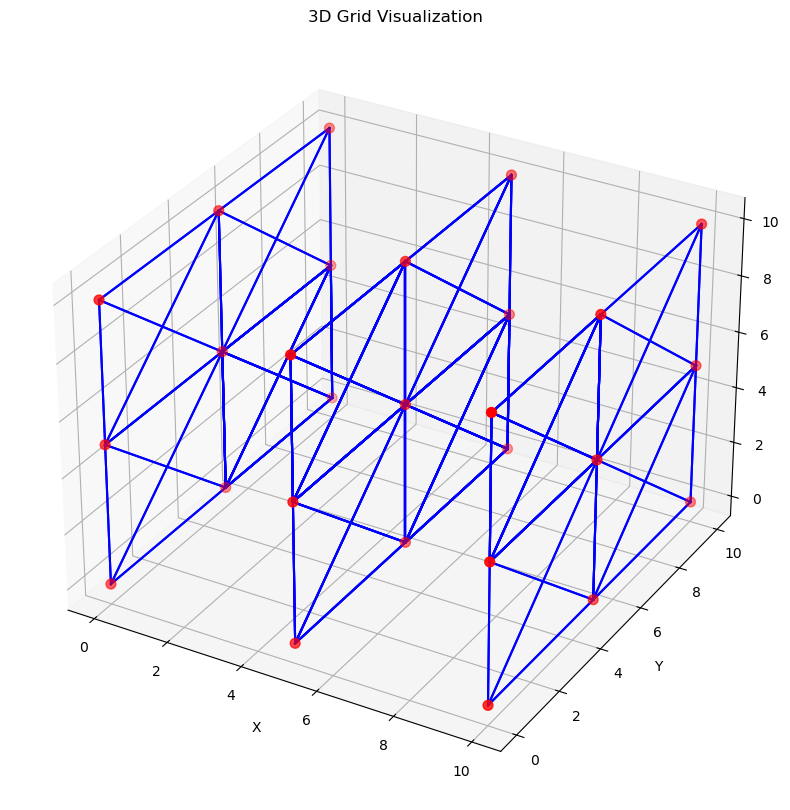

In [21]:
import matplotlib.pyplot as plt


def visualize_grid(coords, elements, patches):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Scatter plot for the coordinates
    ax.scatter(coords[0], coords[1], coords[2], s=50, c='red', marker='o')

    # Plot the grid based on elements
    for col in elements.T:
        ax.plot([coords[0][col[0]], coords[0][col[1]]],
                [coords[1][col[0]], coords[1][col[1]]],
                [coords[2][col[0]], coords[2][col[1]]], c='blue')

        ax.plot([coords[0][col[0]], coords[0][col[2]]],
                [coords[1][col[0]], coords[1][col[2]]],
                [coords[2][col[0]], coords[2][col[2]]], c='blue')

        ax.plot([coords[0][col[1]], coords[0][col[2]]],
                [coords[1][col[1]], coords[1][col[2]]],
                [coords[2][col[1]], coords[2][col[2]]], c='blue')

        ax.plot([coords[0][col[0]], coords[0][col[3]]],
                [coords[1][col[0]], coords[1][col[3]]],
                [coords[2][col[0]], coords[2][col[3]]], c='blue')

        ax.plot([coords[0][col[1]], coords[0][col[3]]],
                [coords[1][col[1]], coords[1][col[3]]],
                [coords[2][col[1]], coords[2][col[3]]], c='blue')

        ax.plot([coords[0][col[2]], coords[0][col[3]]],
                [coords[1][col[2]], coords[1][col[3]]],
                [coords[2][col[2]], coords[2][col[3]]], c='blue')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('3D Grid Visualization')

    plt.show()


visualize_grid(coord, elem, surf)